In [30]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

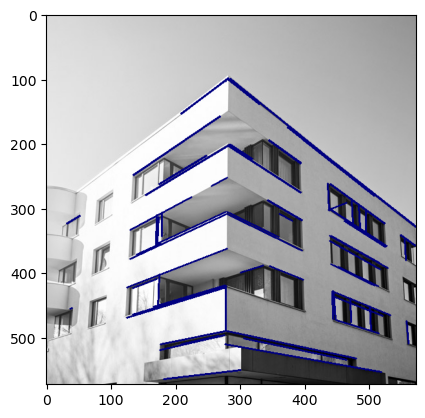

In [31]:
img = cv2.imread('building_2.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 500, 460)
lines = cv2.HoughLinesP(edges, 1.2, np.pi/180, 50, maxLineGap=20)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 128), 2)

# cv2.imwrite('linesDetected.jpg', img)
plt.imshow(img)

(70, 1, 4)


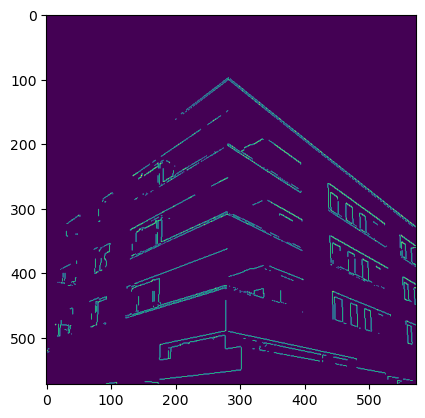

In [32]:
plt.imshow(edges)
# print(lines)
print(lines.shape)

In [33]:
def click_event(event, x, y, flags, params):
    global points
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +str(y), (x,y), font, 1, (255, 0, 0), 2)
        cv2.imshow('image', img)
        points.append([x,y,1])
        
        

In [34]:
# reading the image
img = cv2.imread('building_2.jpg')
# displaying the image

points = []

if img is not None:
    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.imshow('image', img)


    # setting mouse handler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event)
    # print(str(x)+" "+ str(y))

    # wait for a key to be pressed to exit
    cv2.waitKey(30000)

    # close the window
    cv2.destroyAllWindows()
    
print(points)

[[47, 274, 1], [246, 121, 1], [67, 487, 1], [244, 432, 1], [335, 141, 1], [547, 309, 1], [335, 442, 1], [535, 504, 1], [124, 469, 1], [134, 253, 1], [400, 461, 1], [393, 232, 1]]


In [9]:
cv2.destroyAllWindows()

In [35]:
len(points)

12

In [28]:
for i in range(0,12,2):
    print(i)

0
2
4
6
8
10


In [36]:
image = img
lines = []
for i in range(0,12,2):
    point1 = points[i]
    point2 = points[i+1]
    lines.append(np.cross(point1,point2))

    

In [18]:
points[0][0]

46

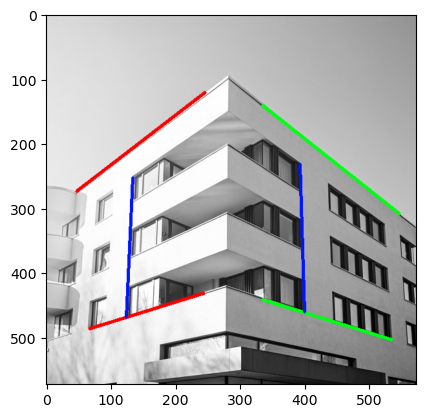

In [37]:
# drawing the lines
image = cv2.imread("building_2.jpg")
image = cv2.line(image, (points[0][0],points[0][1]), (points[1][0],points[1][1]), color=(255,0,0), thickness=4)
image = cv2.line(image, (points[2][0],points[2][1]), (points[3][0],points[3][1]), color=(255,0,0), thickness=4)
image = cv2.line(image, (points[4][0],points[4][1]), (points[5][0],points[5][1]), color=(0,255,20), thickness=4)
image = cv2.line(image, (points[6][0],points[6][1]), (points[7][0],points[7][1]), color=(0,255,20), thickness=4)
image = cv2.line(image, (points[8][0],points[8][1]), (points[9][0],points[9][1]), color=(0,20,255), thickness=4)
image = cv2.line(image, (points[10][0],points[10][1]), (points[11][0],points[11][1]), color=(0,20,255), thickness=4)




plt.imshow(image)

In [38]:
lines

[array([   153,    199, -61717]),
 array([    55,    177, -89884]),
 array([ -168,   212, 26388]),
 array([   -62,    200, -67630]),
 array([   216,     10, -31474]),
 array([   229,     -7, -88373])]

In [39]:
# Vanishing points 
v1 = np.cross(lines[0], lines[1])
v2 = np.cross(lines[2], lines[3])
v3 = np.cross(lines[4], lines[5])

print(v1)
print(v2)
print(v3)

[-6963007 10357817    16136]
[-19615160 -12997896    -20456]
[-1104048 11881022    -3802]


In [41]:
homo_v1 = v1/v1[2]
homo_v2 = v2/v2[2]
homo_v3 = v3/v3[2]

print(homo_v1)
print(homo_v2)
print(homo_v3)

[-431.52001735  641.90735002    1.        ]
[958.89518968 635.4075088    1.        ]
[ 2.90386113e+02 -3.12494003e+03  1.00000000e+00]


In [44]:
u1 = homo_v1[0]
v1 = homo_v1[1]

u2 = homo_v2[0]
v2 = homo_v2[1]

u3 = homo_v3[0]
v3 = homo_v3[1]


A = np.array([[u1 - u3, v1 - v3], [u2 - u3, v2 - v3]])
b = np.array([[(u1-u3)*u2 + (v1-v3)*v2], [(u2-u3)*u1 + (v2-v3)*v1]])

X = np.linalg.solve(A,b)
x0 = float(X[0])
y0 = float(X[1])

f = np.sqrt(-(u1-x0)*(u2-x0)-(v1-y0)*(v2-y0))

print("principal point x0 value: {}".format(x0))
print("principal point y0 value: {}".format(y0))
print("focal length f: {}".format(f))

principal point x0 value: 307.3810977481541
principal point y0 value: 510.54659221598945
focal length f: 681.9110384835695


In [46]:
k = np.array([[f,0,x0],
              [0,f,y0],
              [0,0,1]])

print('K = {}'.format(k)) 

K = [[681.91103848   0.         307.38109775]
 [  0.         681.91103848 510.54659222]
 [  0.           0.           1.        ]]
